In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
in_dir = 'titanic_dataset'
train_csv = 'train.csv'
df = pd.read_csv(os.path.join(in_dir, train_csv))

In [8]:
%matplotlib inline

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


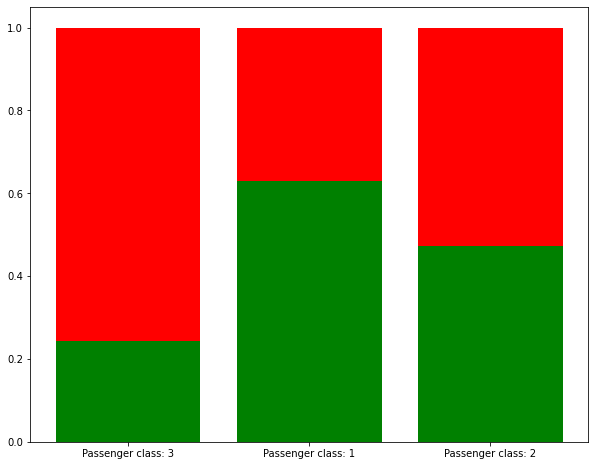

In [54]:
#checking the dependence of Pclass on the survival outcome

fig, ax = plt.subplots(figsize=(10, 8))
for p_class in df['Pclass'].unique():
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Pclass'] == p_class]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
    assert survived_count + dead_count == len(filtered_df), "Something went worng"
    ax.bar(x="Passenger class: {}".format(p_class), height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x="Passenger class: {}".format(p_class), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

male
female


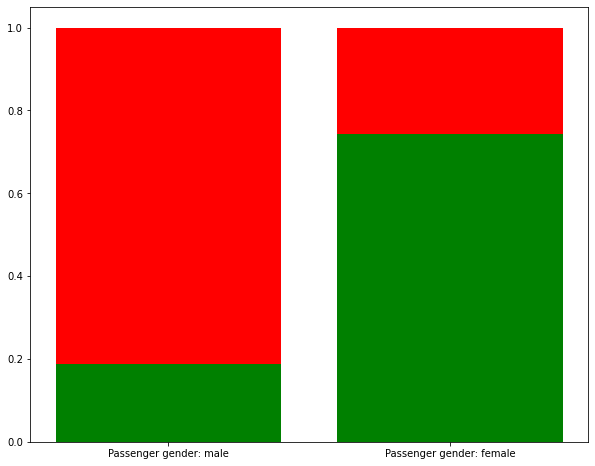

In [55]:
#checking the dependence of passenger gender on the survival outcome

fig, ax = plt.subplots(figsize=(10, 8))
for i, p_gender in enumerate(df['Sex'].unique()):
    print(p_gender)
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Sex'] == p_gender]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
    assert survived_count + dead_count == len(filtered_df), "Something went worng"
    ax.bar(x="Passenger gender: {}".format(p_gender), height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x="Passenger gender: {}".format(p_gender), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

<ipython-input-57-e05eae7472a0>:11: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
<ipython-input-57-e05eae7472a0>:12: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')
<ipython-input-57-e05eae7472a0>:11: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
<ipython-input-57-e05eae7472a0>:12: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')


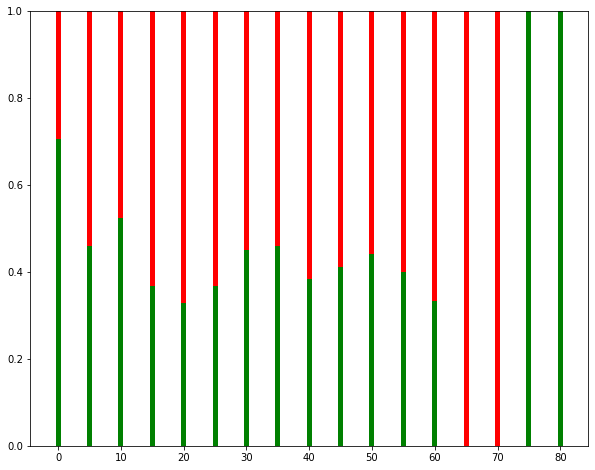

In [57]:
# dependence of Age on the survival of passengers
hist, bin_edges = np.histogram(df['Age'], bins=np.arange(0, 100, 5))

fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(bin_edges)-1):
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Age'].between(left=bin_edges[i], right=bin_edges[i+1])]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
#     print(bin_edges[i], bin_edges[i+1], survived_count, dead_count)
    ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

In [85]:
df['Sex_mod'] = np.where(df['Sex']== 'male', 0, 1)
conditions = [
    (df['Embarked'] == 'S'),
    (df['Embarked'] == 'C'), 
    (df['Embarked'] == 'Q'),
    (df['Embarked'].isnull())
    ]
values = [1, 2, 3, 0]
df['Embarked_mod'] = np.select(conditions, values)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_mod,Embarked_mod
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [92]:
filtered_df = df[df['Age'].notnull()]

In [112]:
# because we already know the survival classes, I think it would be best to use LDA here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = filtered_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_mod', 'Embarked_mod']]
y = filtered_df['Survived']
X, y

(     Pclass   Age  SibSp  Parch     Fare  Sex_mod  Embarked_mod
 0         3  22.0      1      0   7.2500        0             1
 1         1  38.0      1      0  71.2833        1             2
 2         3  26.0      0      0   7.9250        1             1
 3         1  35.0      1      0  53.1000        1             1
 4         3  35.0      0      0   8.0500        0             1
 ..      ...   ...    ...    ...      ...      ...           ...
 885       3  39.0      0      5  29.1250        1             3
 886       2  27.0      0      0  13.0000        0             1
 887       1  19.0      0      0  30.0000        1             1
 889       1  26.0      0      0  30.0000        0             2
 890       3  32.0      0      0   7.7500        0             3
 
 [714 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [97]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X, y).transform(X)

In [111]:
lda.coef_

array([[-1.33917252e+00, -4.49591313e-02, -3.67669250e-01,
        -7.79833386e-02,  1.87787014e-03,  3.36099967e+00,
         1.39035245e-01]])

(array([ 6., 14., 15., 10., 16., 16., 18., 18., 28., 23., 24., 29., 23.,
        21., 23., 18., 30., 32., 31., 28., 22., 53., 75., 57., 37., 27.,
        10.,  7.,  2.,  1.]),
 array([-2.95458165, -2.77382017, -2.59305869, -2.41229721, -2.23153573,
        -2.05077425, -1.87001277, -1.68925128, -1.5084898 , -1.32772832,
        -1.14696684, -0.96620536, -0.78544388, -0.6046824 , -0.42392092,
        -0.24315943, -0.06239795,  0.11836353,  0.29912501,  0.47988649,
         0.66064797,  0.84140945,  1.02217093,  1.20293242,  1.3836939 ,
         1.56445538,  1.74521686,  1.92597834,  2.10673982,  2.2875013 ,
         2.46826278]),
 <BarContainer object of 30 artists>)

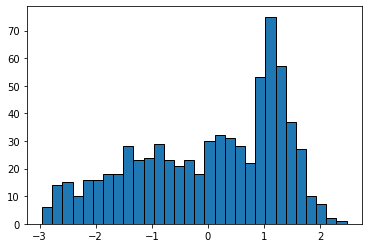

In [107]:
plt.hist(X_lda, ec='k', bins=30)

Text(0.5, 1.0, 'LDA of IRIS dataset')

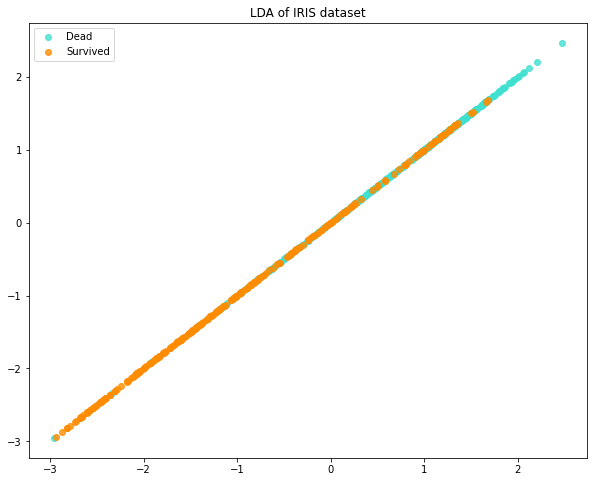

In [102]:
target_names=['Dead', 'Survived']
colors = ["turquoise", "darkorange"]
fig, ax = plt.subplots(figsize=(10, 8))
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_lda[y == i], X_lda[y == i], alpha=0.8, color=color, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")